In [2]:
import pandas as pd
import numpy as np
import os
import re

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
DIR = 'data'

# Movies

In [4]:
movies = pd.read_csv(os.path.join(DIR, 'movies.csv'))
print(f'Shape: {movies.shape}')

# Year
def identify_year(title):
    pattern = r'\((\d{4})\)$'
    # Search for the pattern in the string
    m = re.search(pattern, title)
    if m:
        return int(m.group(1))
    else:
        return np.nan
    
movies['year'] = movies['title'].apply(identify_year)
# Genres
def flatten(xss):
    return [x for xs in xss for x in xs]

raw_genres = movies['genres'].unique()
genres = set(flatten([item.split('|') for item in raw_genres]))
print('Genres', genres)

for genre in genres:
    movies[f'is_{genre}'] = movies['genres'].apply(lambda x: genre in x)

display(movies.head())

Shape: (9742, 3)
Genres {'War', 'Romance', 'Fantasy', 'Sci-Fi', 'Musical', 'Western', 'Thriller', 'Action', 'Film-Noir', 'Comedy', 'Crime', 'Animation', 'Adventure', 'Children', 'Mystery', 'IMAX', 'Documentary', '(no genres listed)', 'Drama', 'Horror'}


,movieId,title,genres,year,is_War,is_Romance,is_Fantasy,is_Sci-Fi,is_Musical,is_Western,...,is_Crime,is_Animation,is_Adventure,is_Children,is_Mystery,is_IMAX,is_Documentary,is_(no genres listed),is_Drama,is_Horror
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,False,False,True,False,False,False,...,False,False,True,True,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,5,Father of the Bride Part II (1995),Comedy,1995.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Year

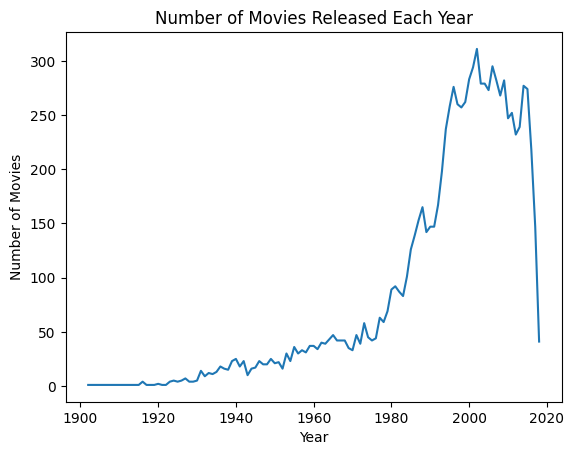

In [5]:
sns.lineplot(data = movies.groupby('year')['title'].agg('count').reset_index(),
         x='year', y='title')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.show()

## Genre

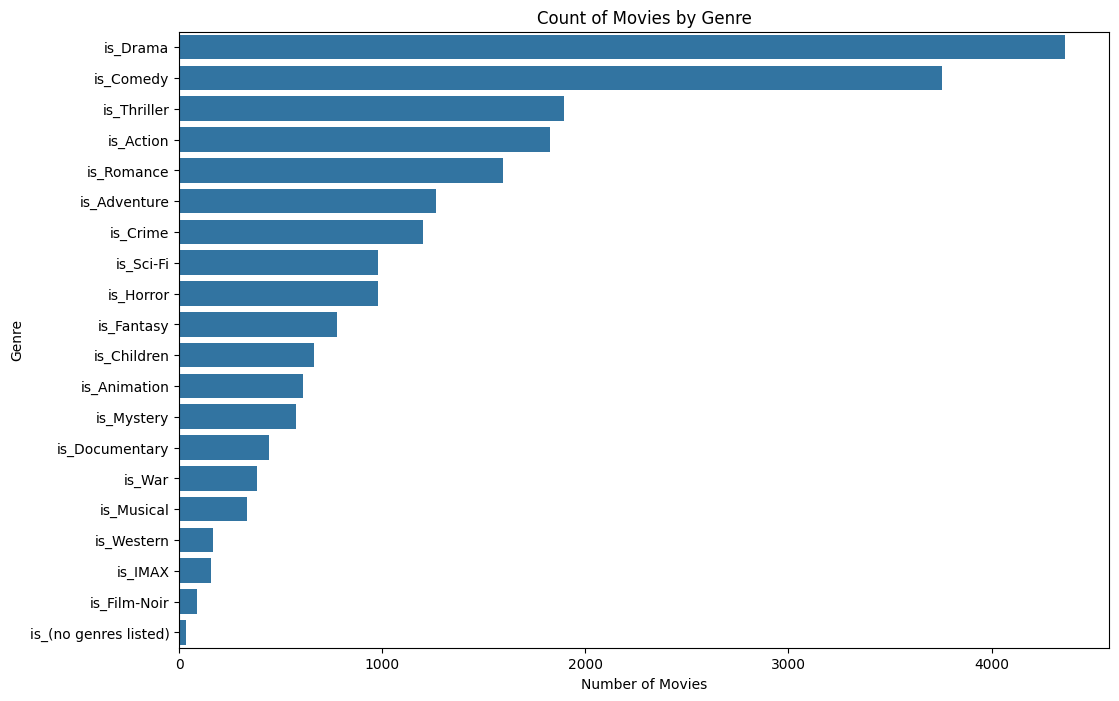

In [6]:
genre_counts = movies.iloc[:, 4:].sum()  # Assuming genre columns start from the 5th column

# Create a DataFrame for plotting
genre_counts_df = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})

# Plot the count of movies for each genre
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_counts_df, y='Genre', x='Count', order=genre_counts_df.sort_values('Count', ascending=False)['Genre'])
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Count of Movies by Genre')
plt.show()

# Ratings

In [7]:
ratings = pd.read_csv(os.path.join(DIR, 'ratings.csv'))
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year_month'] = ratings['timestamp'].dt.to_period('M').dt.to_timestamp()

ratings['date'] = ratings['timestamp'].dt.date
print(f'Shape: {ratings.shape}')

print(f'Number of users: {ratings["userId"].nunique()}')
print(f'Number of movies: {ratings["movieId"].nunique()}')

ratings.head()

Shape: (100836, 6)
Number of users: 610
Number of movies: 9724


,userId,movieId,rating,timestamp,year_month,date
0,1,1,4.0,2000-07-30 18:45:03,2000-07-01,2000-07-30
1,1,3,4.0,2000-07-30 18:20:47,2000-07-01,2000-07-30
2,1,6,4.0,2000-07-30 18:37:04,2000-07-01,2000-07-30
3,1,47,5.0,2000-07-30 19:03:35,2000-07-01,2000-07-30
4,1,50,5.0,2000-07-30 18:48:51,2000-07-01,2000-07-30


## Ratings

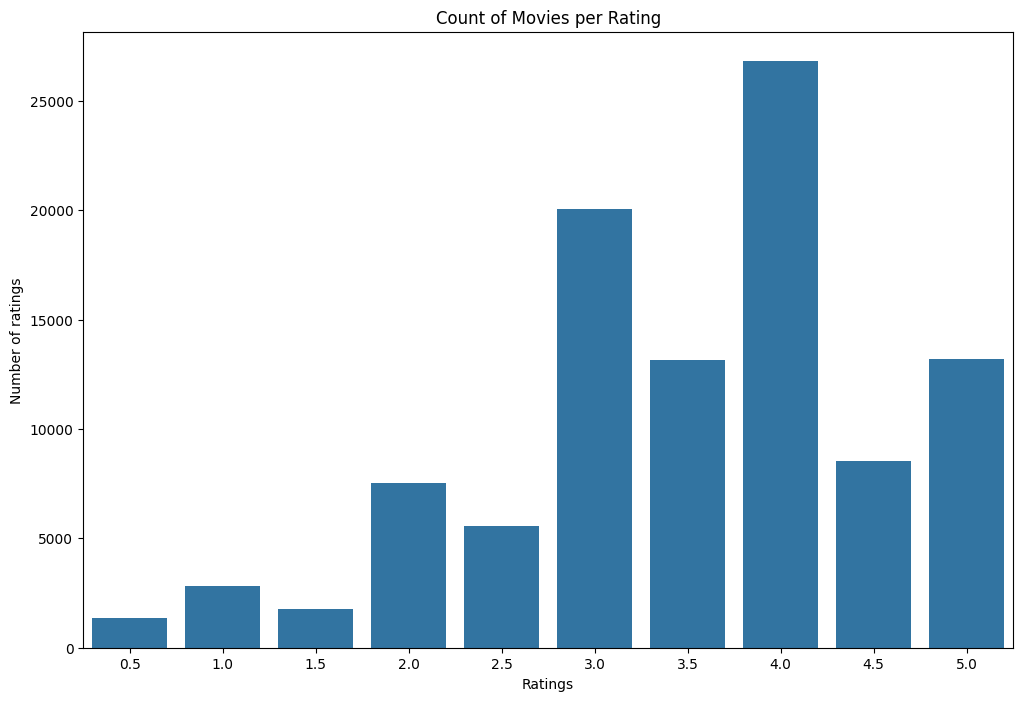

In [8]:
# Plot the count of movies for each genre
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings, x='rating')
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.title('Count of Movies per Rating')
plt.show()

## Ratings per movie

In [9]:
movie_ratings = ratings.groupby('movieId').agg({'rating': ['mean', 'count', 'std']})
movie_ratings.columns = ['mean', 'count_', 'std']
movie_ratings = pd.merge(movie_ratings, movies, on='movieId', how='left')[['title', 'movieId', 'mean', 'std', 'count_']]

movie_ratings = movie_ratings.reset_index().query('count_ > 50')
movie_ratings.sort_values('mean', ascending=False).head(10)

,index,title,movieId,mean,std,count_
277,277,"Shawshank Redemption, The (1994)",318,4.429022,0.713019,317
659,659,"Godfather, The (1972)",858,4.289062,0.904344,192
2224,2224,Fight Club (1999),2959,4.272936,0.861384,218
974,974,Cool Hand Luke (1967),1276,4.271930,0.620125,57
602,602,Dr. Strangelove or: How I Learned to Stop Worr...,750,4.268041,0.807071,97
686,686,Rear Window (1954),904,4.261905,0.785701,84
921,921,"Godfather: Part II, The (1974)",1221,4.259690,0.803072,129
6298,6298,"Departed, The (2006)",48516,4.252336,0.691504,107
913,913,Goodfellas (1990),1213,4.250000,0.683374,126
694,694,Casablanca (1942),912,4.240000,0.900281,100


## Users

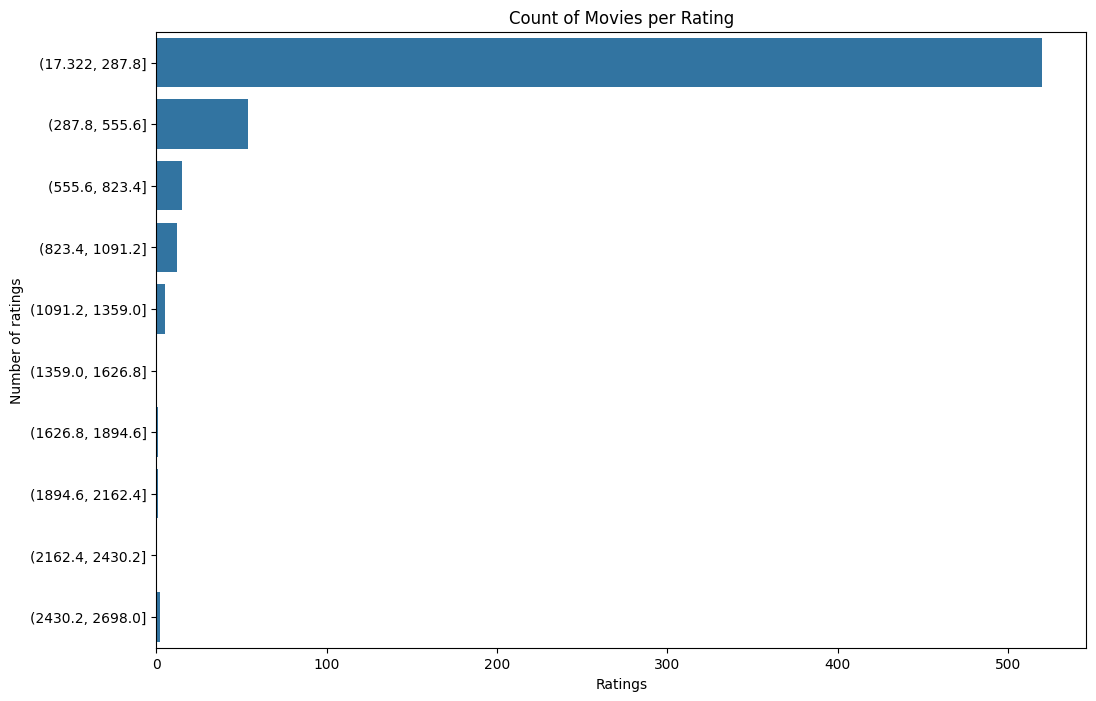

In [14]:
user_counts = ratings.groupby('userId')['movieId'].count().reset_index().rename(columns={'movieId': 'n_ratings'})
# LOG??
user_counts['n_ratings_bin'] = pd.cut( user_counts['n_ratings'], bins=10)

# Plot the count of movies for each genre
plt.figure(figsize=(12, 8))
sns.countplot(data=user_counts, y='n_ratings_bin')
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.title('Count of Movies per Rating')
plt.show()

In [19]:
print(f'Fewest Rating: {user_counts.n_ratings.min()}')
print(f'Most Rating: {user_counts.n_ratings.max()}')

Fewest Rating: 20
Most Rating: 2698


## Timestamp

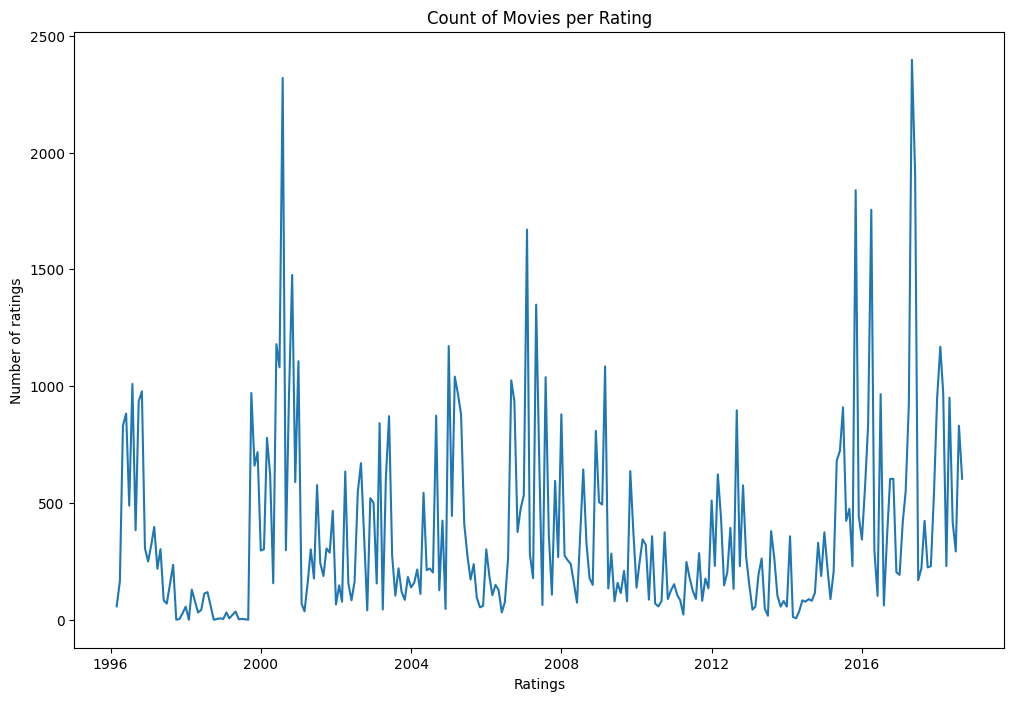

In [11]:
# Plot the count of movies for each genre
plt.figure(figsize=(12, 8))
sns.lineplot(data=ratings.groupby('year_month')['userId'].count().reset_index(), x='year_month', y='userId')
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.title('Count of Movies per Rating')
plt.show()

# Links

In [12]:
links = pd.read_csv(os.path.join(DIR, 'links.csv'))
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


# Tags

In [13]:
tags = pd.read_csv(os.path.join(DIR, 'tags.csv'))
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978
